<div class="alert alert-info"><strong>NOTE:</strong> Multi-class classifications usually involve converting the target vector to a one_hot encoded matrix. That is, if 5 labels show up as<br>
<pre style='background-color:rgb(217,237,247)'>tensor([0,2,1,0,1])</pre>
then we would encode them as:
<pre style='background-color:rgb(217,237,247)'>tensor([[1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0]])</pre>
This is easily accomplished with <a href='https://pytorch.org/docs/stable/nn.html#one-hot'><strong><tt>torch.nn.functional.one_hot()</tt></strong></a>.<br>
However, our loss function <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a> takes care of this for us.</div>

## Perform standard imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create a model class
For this exercise we're using the Iris dataset. Since a single straight line can't classify three flowers we should include at least one hidden layer in our model.

In the forward section we'll use the <a href='https://en.wikipedia.org/wiki/Rectifier_(neural_networks)'>rectified linear unit</a> (ReLU)  function<br>
$\quad f(x)=max(0,x)$<br>
as our activation function. This is available as a full module <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong><tt>torch.nn.ReLU</tt></strong></a> or as just a functional call <a href='https://pytorch.org/docs/stable/nn.html#id27'><strong><tt>torch.nn.functional.relu</tt></strong></a>

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x)) # we can also call it as a1 and pass a1 to next layer
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

## Load the iris dataset

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Plot the dataset
The iris dataset has 4 features. To get an idea how they correlate we can plot four different relationships among them.<br>
We'll use the index positions of the columns to grab their names in pairs with <tt>plots = [(0,1),(2,3),(0,2),(1,3)]</tt>.<br>
Here <tt>(0,1)</tt> sets "sepal length (cm)" as <tt>x</tt> and "sepal width (cm)" as <tt>y</tt>

## Perform Train/Test/Split

In [ ]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))
 # one hot encoding not needed with Cross Entropy Loss
 # When working with multiclass classifications we have to do one hot encoding for output
 # But with pytirch if we use cross enttopy loss we need not do one hot encoding
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Prepare DataLoader
For this analysis we don't need to create a Dataset object, but we should take advantage of PyTorch's DataLoader tool. Even though our dataset is small (120 training samples), we'll load it into our model in two batches. This technique becomes very helpful with large datasets.

Note that scikit-learn already shuffled the source dataset before preparing train and test sets. We'll still benefit from the DataLoader shuffle utility for model training if we make multiple passes throught the dataset.

In [ ]:
X_train.shape

torch.Size([120, 4])

In [ ]:
X_test.shape

torch.Size([30, 4])

In [ ]:
X_train

tensor([[5.6000, 2.7000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [7.0000, 3.2000, 4.7000, 1

y_train = y_train.reshape(-1,1)
 if i reshape i am getting error at Cross_entropy
 6     y_pred = model.forward(X_train)
----> 7     loss = criterion(y_pred, y_train)
      8     losses.append(loss.detach().numpy())
      9

2 frames
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py in cross_entropy(input, target, weight, size_average, ignore_index, reduce, reduction, label_smoothing)
   3027     if size_average is not None or reduce is not None:
   3028         reduction = _Reduction.legacy_get_string(size_average, reduce)
-> 3029     return torch._C._nn.cross_entropy_loss(input, target, weight, _Reduction.get_enum(reduction), ignore_index, label_smoothing)
   3030
   3031

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [ ]:
y_train

tensor([1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1,
        2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1,
        2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

trainTensorDataset = TensorDataset(X_train,y_train)
train_loader = DataLoader(trainTensorDataset, batch_size=50, shuffle=True)

as seen in  02-DataSets-with-Pytorch.ipynb we have to create iris_loader and iris = TensorDataset and then pass them to in a for loop inside for i in range(epochs), pass them as for i in list(loader)

Something like merge the X_train and X_test in to a tensordataset and pass it to a loader

In [ ]:
train_loader

## Define loss equations and optimizations
As before, we'll utilize <a href='https://en.wikipedia.org/wiki/Cross_entropy'>Cross Entropy</a> with <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a><br>
For the optimizer, we'll use a variation of Stochastic Gradient Descent called <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam'>Adam</a> (short for Adaptive Moment Estimation), with <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><strong><tt>torch.optim.Adam()</tt></strong></a>

In [ ]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

## Train the model

In [ ]:
print("X is")
print(list(train_loader)[0][0] )# -- X
print("y is")
print(list(train_loader)[0][1]) # -- y


X is
tensor([[4.6000, 3.4000, 1.4000, 0.3000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [5.7000, 2.8000, 4.1000, 1.3000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [5.7000, 2.5000, 5.0000, 2.0000],
        [6.7000, 2.5000, 5.80

In [ ]:
#### Source: https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/

'''import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Read data, convert to NumPy arrays
data = pd.read_csv("sonar.csv", header=None)
X = data.iloc[:, 0:60].values
y = data.iloc[:, 60].values

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# set up DataLoader for training set
loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=16)

# create model
model = nn.Sequential(
    nn.Linear(60, 60),
    nn.ReLU(),
    nn.Linear(60, 30),
    nn.ReLU(),
    nn.Linear(30, 1),
    nn.Sigmoid()
)

# Train the model
n_epochs = 200
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))'''

'import pandas as pd\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom torch.utils.data import DataLoader\nfrom sklearn.preprocessing import LabelEncoder\nfrom sklearn.model_selection import train_test_split\n\n# Read data, convert to NumPy arrays\ndata = pd.read_csv("sonar.csv", header=None)\nX = data.iloc[:, 0:60].values\ny = data.iloc[:, 60].values\n\n# encode class values as integers\nencoder = LabelEncoder()\nencoder.fit(y)\ny = encoder.transform(y)\n\n# convert into PyTorch tensors\nX = torch.tensor(X, dtype=torch.float32)\ny = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)\n\n# train-test split for evaluation of the model\nX_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)\n\n# set up DataLoader for training set\nloader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=16)\n\n# create model\nmodel = nn.Sequential(\n    nn.Linear(60, 60),\n    nn.ReLU(),\n    nn.Linear(60, 30),\n    nn.ReLU(),\n    n

In [ ]:
epochs = 200
losses = []

for i in range(epochs):
  i+=1
  # passing the data in batches also makes the optimization run faster as the backward propagation is done for every batch
  # in 03-Basic-PyTorch-NN.ipynb, at  epoch: 11 the loss is 0.98190635
  # in here the loss at epoch 11 is 0.58931100 less comparatively.

  for batch in list(train_loader):
    y_pred = model.forward(batch[0])
    loss = criterion(y_pred, batch[1])

    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.detach().numpy())


#https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/

epoch:  1  loss: 1.09690070
epoch:  1  loss: 1.08127642
epoch:  1  loss: 1.07440186
epoch: 11  loss: 0.67383498
epoch: 11  loss: 0.65146393
epoch: 11  loss: 0.58931100
epoch: 21  loss: 0.28230029
epoch: 21  loss: 0.27395669
epoch: 21  loss: 0.23577492
epoch: 31  loss: 0.10890035
epoch: 31  loss: 0.15104970
epoch: 31  loss: 0.06299437
epoch: 41  loss: 0.07970414
epoch: 41  loss: 0.06109041
epoch: 41  loss: 0.13971999
epoch: 51  loss: 0.09169167
epoch: 51  loss: 0.05910989
epoch: 51  loss: 0.10680328
epoch: 61  loss: 0.03877160
epoch: 61  loss: 0.04690279
epoch: 61  loss: 0.19907485
epoch: 71  loss: 0.11655214
epoch: 71  loss: 0.07321855
epoch: 71  loss: 0.06785194
epoch: 81  loss: 0.03486630
epoch: 81  loss: 0.07580942
epoch: 81  loss: 0.11289573
epoch: 91  loss: 0.09447947
epoch: 91  loss: 0.04608996
epoch: 91  loss: 0.04546140
epoch: 101  loss: 0.08570013
epoch: 101  loss: 0.05192953
epoch: 101  loss: 0.06585526
epoch: 111  loss: 0.07730377
epoch: 111  loss: 0.05767531
epoch: 111  los

## Plot the loss function

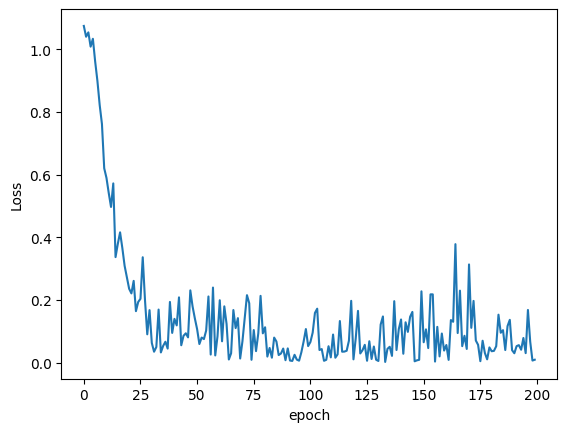

In [ ]:
plt.plot(range(200), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

## Validate the model
Now we run the test set through the model to see if the loss calculation resembles the training data.

In [ ]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.11278272


In [ ]:
y_test

tensor([1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0,
        2, 2, 1, 1, 2, 2])

In [ ]:
y_val

tensor([[ -2.9710,   6.4432,  -1.8853],
        [ -2.6691,   7.1432,  -2.6566],
        [ 16.6743,   9.2238, -21.9410],
        [ -6.1531,   6.4452,   1.0081],
        [-12.0347,   5.5547,   7.0062],
        [-18.6781,   5.2463,  13.2774],
        [ 16.5369,   9.2626, -21.8113],
        [ 17.8614,   9.8724, -23.4918],
        [-12.3593,   5.6669,   7.2160],
        [-16.5866,   5.2501,  11.3514],
        [-17.7201,   5.0971,  12.4993],
        [ 16.2501,   8.9999, -21.4036],
        [-16.8294,   4.8747,  11.8406],
        [ -5.9461,   6.3238,   0.9104],
        [-13.8186,   5.4909,   8.6533],
        [ -2.5508,   6.9391,  -2.6196],
        [ -9.6029,   5.6481,   4.7123],
        [ 18.1739,  10.0428, -23.8995],
        [ -5.6613,   6.5276,   0.5052],
        [-13.5048,   6.1111,   7.9486],
        [ 17.2582,   9.5457, -22.7101],
        [ 18.8915,  10.4269, -24.8201],
        [-17.4532,   4.9639,  12.3676],
        [ 17.0356,   9.4270, -22.4256],
        [-11.5484,   5.2868,   6.7418],


In [ ]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}',end='')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            print('\ttrue')
        else:
          print('\t\tfalse')
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-2.9710,  6.4432, -1.8853])     1	true
 2. tensor([-2.6691,  7.1432, -2.6566])     1	true
 3. tensor([ 16.6743,   9.2238, -21.9410])  0	true
 4. tensor([-6.1531,  6.4452,  1.0081])     1	true
 5. tensor([-12.0347,   5.5547,   7.0062])  2	true
 6. tensor([-18.6781,   5.2463,  13.2774])  2	true
 7. tensor([ 16.5369,   9.2626, -21.8113])  0	true
 8. tensor([ 17.8614,   9.8724, -23.4918])  0	true
 9. tensor([-12.3593,   5.6669,   7.2160])  2	true
10. tensor([-16.5866,   5.2501,  11.3514])  2	true
11. tensor([-17.7201,   5.0971,  12.4993])  2	true
12. tensor([ 16.2501,   8.9999, -21.4036])  0	true
13. tensor([-16.8294,   4.8747,  11.8406])  2	true
14. tensor([-5.9461,  6.3238,  0.9104])     1	true
15. tensor([-13.8186,   5.4909,   8.6533])  2	true
16. tensor([-2.5508,  6.9391, -2.6196])     1	true
17. tensor([-9.6029,  5.6481,  4.7123])     2		false
18. tensor([ 18.1739,  10.0428, -23.8995])  0	true
19. tensor([-5.6613,  6.5276,  0.5052])     1	true
20. tensor([-13.5048,   6.111

Here we can see that #17 and #26 are misclassified.